# Problem 1. (20 points)
Call a number n cube-summable if it can be expressed as a sum of distinct positive perfect cubes. So,
the number 9 is cube-summable since 9 = 13 + 23, but the number 2 is not. In this coding assignment you have to find out how many cube-summable numbers are there between 1 and a million?


### a. In your pdf file/iPython notebook, clearly write down how the above problem is a special case of the SUBSETSUM problem. So in particular, you have to write what the a1, a2, . . . , an’s are, how many (the n) of them there are, and what the target B is, which will allow you to answer this question. (5 points)

This is a special case of the subsetsum problem because we are trying to find all of the possible subsets that sum to less than 1 million. 


Our input will be the cube of positive integers 1, 2, ... 100. So, a1 = 1^3, a2 = 2^3, .... an = 100^3. There will be one hundered terms (n = 100) because 100^3 = 1,000,000, so no greater number can be added without us exceeding our sum. 


This differs from the original subsetsum problem because as opposed to there being one single target integer, our target all values less than 1 million. 


(In theory, we will modify the existing subset sum algorithm to check if it is less than B, and then increment a counter each time it is).

In [18]:
import numpy as np
import math
import time

In [19]:
'''
input: integer n
output: an array of the cubes of all integers from 1 to n.
'''

def buildArray(n):
    A = [0] * n
    
    # for all 1 ≤ i ≤ n, find i^3
    for i in range (0, n):
        A[i] = (i+1)*(i+1)*(i+1)
    return A

### b. Implement the dynamic programming algorithm for SUBSETSUM problem, and use your above argument to find the number of cube-summable numbers among the first million numbers (inclusive). (15 points)

In [20]:
''' 
input: array of cubes of positive integers 1 to 100
output: number of possible subsets < 1,000,000
'''
def SubSetCount(A, B):
    
    # based on B, figure out how many terms are in input array
    n = math.floor((B + 1)**(1/3))
    F = np.zeros((n, B + 1))

    # deal with basecases
    for m in range(n):
        F[m, 0] = 1

    # count number where the value is being 
    for m in range (n):
        for b in range (1, B + 1):
            if (b - A[m] < 0):
                F[m, b] = F[m - 1,b]
            else:
                F[m, b] = max(F[m -1, b], F[m -1, b - A[m]])
    
         
               
    # RECOVERY
    # want to count the number of 1s on the bottom row, because those represent integers 
    # that can be reached by some combination of cubeable numbers. 
    # initialize variable to store number of possible integers to be reached
    numPossible = 0
    for i in range (B):
        if (F[n-1, i] == 1):
            numPossible = numPossible + 1
    
    return numPossible
    
    # these integers are all guaranteed to be 1,000,000 or less, because we are not checking
    # if we can reach any sum greater than 1,000,000. 


In [17]:
A = buildArray(1000000)
SubSetCount(A, 1000000)

997212

So, there are **997212** cube summable numbers between 1 and 1 million. 

### Now that you have coded everything up, hopefully you can easily find the number of cube-summable numbers among the first half a million. Do you note something interesting? If you do, write this down as well.

In [21]:
B = buildArray(500000)
SubSetCount(B, 500000)

497212

It is very close to half of the number of cube-summable numbers among a million. It is only ~1000 off. This is suprising considering how large the numbers are...

Curiously, if we graph it:

In [39]:
import matplotlib
import pandas as pd

df = pd.DataFrame(columns=['limit', 'numberCubeSummable'], index=range(1, 1000))

i = 0
for d in range (0, 1000000, 10000):
    df.limit[i] = d
    B = buildArray(d)
    df.numberCubeSummable[i] = SubSetCount(B, d)
    i = i + 1

In [40]:
df.head()

,limit,numberCubeSummable
1,10000,7235
2,20000,17212
3,30000,27212
4,40000,37212
5,50000,47212


<AxesSubplot:title={'center':'Number of Cube Summable Numbers Among Limit \n'}, xlabel="Limit 'n'", ylabel='Number Cube Summable'>

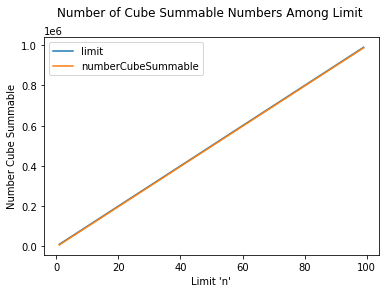

In [41]:
#plot the data against itself 
df.plot(title = 'Number of Cube Summable Numbers Among Limit \n', xlabel= 'Limit \'n\'', ylabel= 'Number Cube Summable')

### Credit Statement: 
Conversation and consulation with Tucker Simpson, Julia Martin.

# Problem 2. (25 points)

As in Coding Assignment 1, for a positve integer n, define An to be the array of single-digit non-negative
integers containing the first n digits of π. So A1 = [3], A2 = [3, 1], and so on. You have to write code which takes input n and finds the length of the longest increasing subsequence in An.

In [48]:
'''
helper function reading the n first numbers of pi and returns a list containing these,
the function was given on canvas
'''

def read_pi(n):
    #opens the file name "pi" and reads the first n digits
    #puts it in the list pi, and returns that list
    pi = list()
    f = open('pi','r')
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    return pi


a. Implement the $O(n^2)$ time algorithm for LIS. Use this to return the length of an LIS of A10000, that is, the length of an LIS among the first 10,000 digits of π? Does this code return the length of an LIS of A1000000? If so, how long did it take? (15 points)

In [46]:
'''implement O(n^2) algorithm for LIS'''

def LIS(b):
    # initalize time counter
    startTime = time.time()
    
    # obtain array of amount of digits
    A = read_pi(b)
    # allocate space such that L[m] contains LIS(m)
    n = len(A)
    L = np.zeros(n)
    
    # base case (technically is addressed by line above)
    L[0] = 0
    
    # initalize running maximum to zero
    maxLIS = 0 
    for m in range (1, n):
        L[m] = 1 
        
        
        for j in range (m):
            if (A[j] <= A[m]):
                L[m] = max(1 + L[j], L[m])
          
        # maximize over running maximum and new value
        maxLIS = max(maxLIS, L[m])
    
    # capture end time
    endTime = time.time()
    # calculate total runtime
    totalTime = endTime -startTime 
    return maxLIS, 'time: ' + str(totalTime)
            
    

In [26]:
LIS(10000)

(1136.0, 'time: 13.758015871047974')

In [ ]:
LIS(1000000)

b. Implement the $O(n log n)$ time algorithm for LIS. Use this to return the length of an LIS of A1000000, that is, the length of an LIS among the first million digits of π? How long did this take? (10 points)

In [48]:
''' 
find the largest entry ≤ A[m] in the sorted array D

BinarySearch method for ease of use
input: Sorted array D[1:t], element A[m]


'''

def BinSearch(D, A):
    L = 0
    U = len(D)
    s = math.ceil((L + U)/2)
    
    while (U - L > 1):
        s = math.ceil((L + U)/2)
        if (D[s] <= A):
            L = s
            

        else:    
            U = s
           
   
    return L

In [88]:
def LISFaster(n):
    startTime = time.time()
    # obtain array of first amount of digits
    A = read_pi(n)
    
    # allocate space to contain LIS(m)
    L = np.zeros(n, dtype = int)

    # initalize t to zero, D and E to empty arrays
    # t is the longest LIS seen so far
    t = 0
    # D[s] will contain the smallest array element A[j] such that LIS A[1:j] is length s
    D = []

    
    # base case
    L[0] = 0
    # initialize maxLIS
    maxLis = 0
    
    for m in range (1, n):
        ss = BinSearch(D, A[m]) # <--  find the largest entry ≤ A[m] in the sorted array D
        L[m] = 1 + ss
        
        # check if current t is less than L[m]
        if (L[m] > t-1):
            D.append(A[m])
            t = t + 1

       
        # else, update array D
        elif (A[m] < D[L[m]]):
            D[L[m]] = A[m]
       
    
        maxLis = max(maxLis, L[m])
    
    
    endTime = time.time()
    # calculate total runtime
    totalTime = endTime - startTime
    return maxLis, 'time: ' + str(totalTime)
        

    

In [96]:
LISFaster(1000000)

(101892, 'time: 4.0173280239105225')

### Credit Statement: 
Conversation and consultation with Tucker Simpson, Julia Martin.